In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Goa.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Copperleaf,1200,"Mughlai,Seafood,North Indian,Chinese",Goa,Penha de Franca,Casual Dining,"1130am to 4pm,7pm to 1145pm(Mon-Sun)",Excellent,4.5,695
1,Cafe Cotinga,1200,"Continental,North Indian,Bakery",Goa,Anjuna,Casual Dining,8am to 12midnight(Mon-Sun),Very Good,4.4,517
2,The Fisherman's Wharf,1100,"Seafood,Goan,North Indian,Continental,Asian",Goa,Panaji,Casual Dining,"12noon to 12midnight(Mon-Sat),124pm to ...",Excellent,4.5,1197
3,Route 66,1250,"American,BBQ,Burger",Goa,Panaji,Casual Dining,12noon to 1130pm(Mon-Sun),Very Good,4.3,763
4,Tio Tilly's Bar & Kitchen,800,"Continental,Finger Food,Burger,Pizza",Goa,Calangute,Bar,1130am to 12midnight(Mon-Sun),Very Good,4.4,560


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
Name                572 non-null object
Price               572 non-null int64
Cuisine_Category    571 non-null object
City                572 non-null object
Region              572 non-null object
Cuisine_Type        572 non-null object
Timing              568 non-null object
Rating_Types        572 non-null object
Rating              572 non-null float64
Votes               572 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 44.8+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,572.000000,572.000000,572.000000
mean,634.038462,3.451923,60.190559
std,351.940259,0.412646,106.269181
min,0.000000,2.300000,4.000000
25%,400.000000,3.200000,11.000000
50%,600.000000,3.400000,23.000000
75%,800.000000,3.700000,57.000000
max,2500.000000,4.600000,1197.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              4
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Patisserie Victoria    2
Shahi Darbar           2
KFC                    2
Flamingo               2
Goan Spice             2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Panaji             123
Margao              91
Calangute           65
Penha de Franca     31
Anjuna              29
Candolim            25
Mapusa              21
Colva               21
Vagator             20
Baga                17
Name: Region, dtype: int64

Text(0.5,1,'Region')

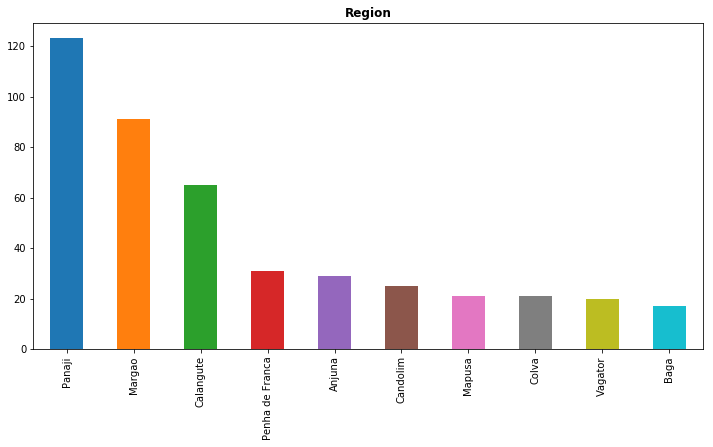

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

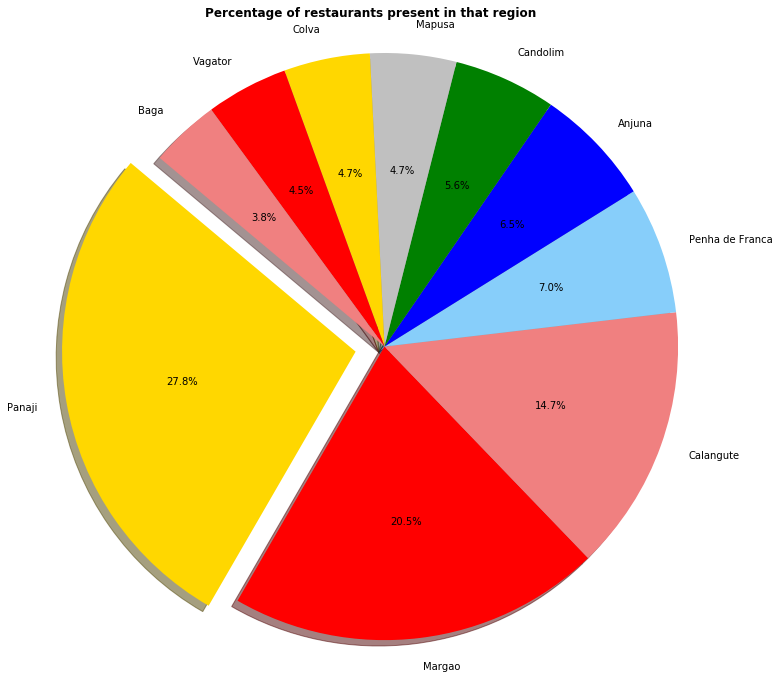

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      287
Good         200
Very Good     73
Excellent      5
Poor           2
Ottimo         1
Bueno          1
Media          1
Bom            1
Buono          1
Name: Rating_Types, dtype: int64

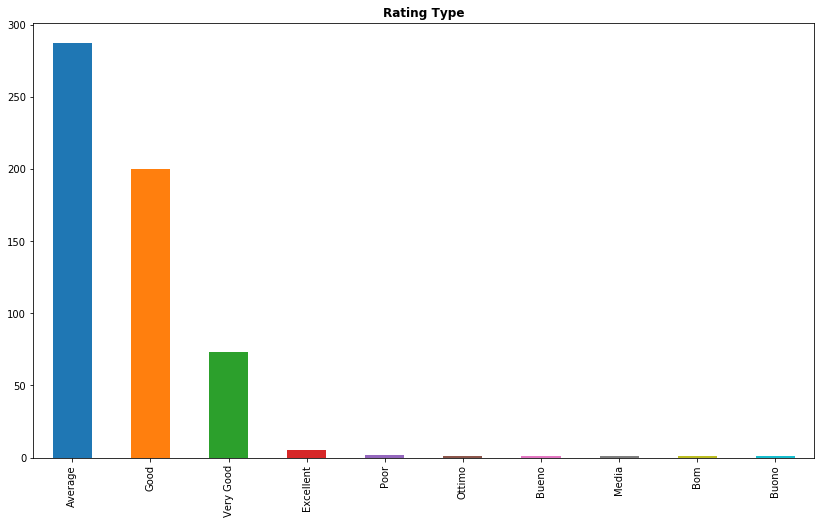

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Casual Dining     364
Quick Bites       113
Café               26
Dessert Parlor     20
Bakery             15
Bar                12
none                6
Fine Dining         5
Beverage Shop       3
Food Court          3
Name: Cuisine_Type, dtype: int64

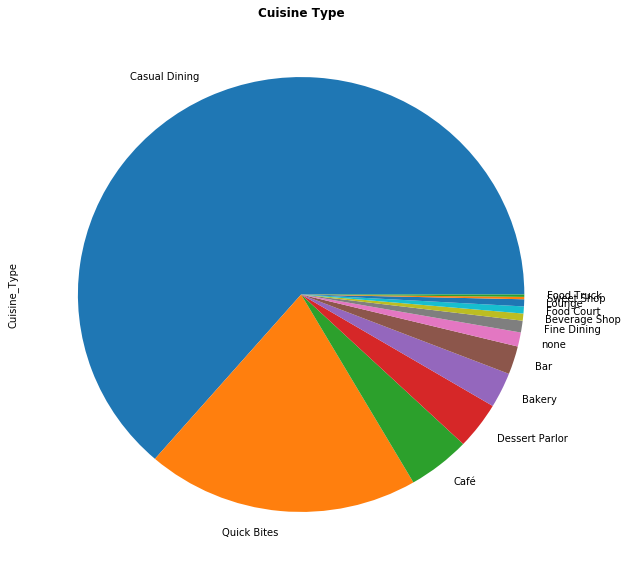

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Casual Dining

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4516754850088174


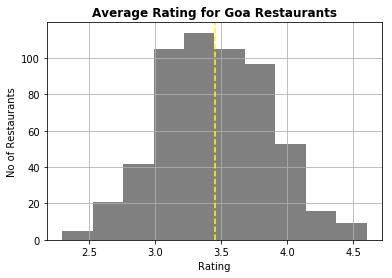

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Goa Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Goa is found to be around 3.4

# Top cuisines in Goa

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

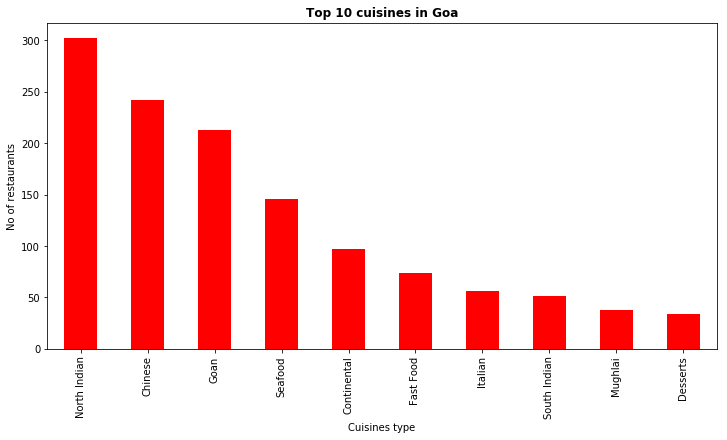

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Goa',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

500     83
800     65
400     62
600     56
700     45
1000    41
300     39
1200    25
250     20
200     19
450     19
350     11
650     11
900     10
0        8
1500     8
150      8
550      7
1100     5
1300     5
Name: Price, dtype: int64

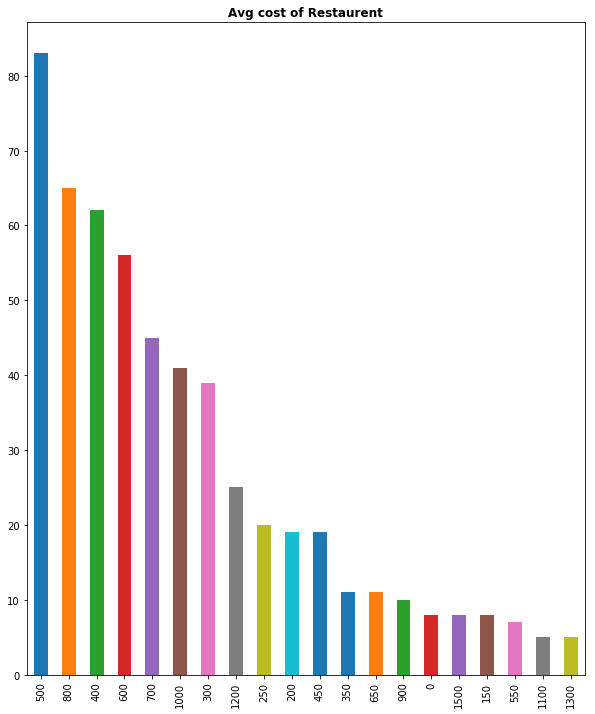

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

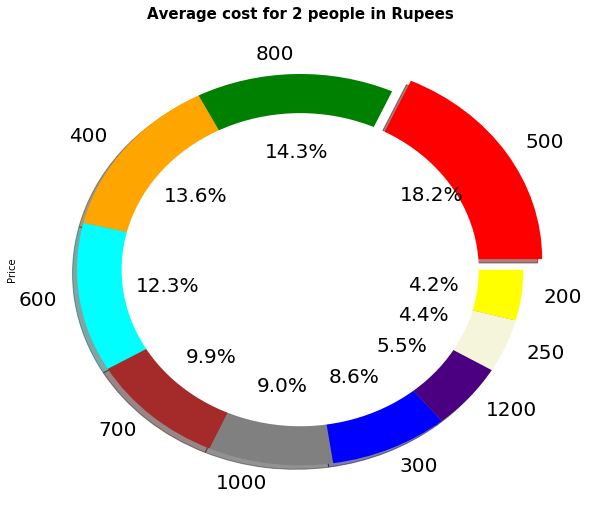

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 500